# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = "IAD32"
COLLABORATORS = "Marcin Słyś 408197, Michał Surówka 402299, Karol Śliwa 406441"

---

## Zestaw zadań 6: Analiza wariancji (Notatnik 1/1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as itt

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [2]:
# Dane do testów

test_data_1 = pd.DataFrame(columns=["A1", "A2", "A3"])
test_data_1["A1"] = [1802, 1992, 1854, 1880, 1761, 1900]
test_data_1["A2"] = [1664, 1755, 1823, 1862, np.nan, np.nan]
test_data_1["A3"] = [1877, 1710, 1882, 1720, 1950, np.nan]
test_data_1

,A1,A2,A3
0,1802,1664.0,1877.0
1,1992,1755.0,1710.0
2,1854,1823.0,1882.0
3,1880,1862.0,1720.0
4,1761,NaN,1950.0
5,1900,NaN,NaN


In [3]:
# Dane do testów

test_data_2 = pd.DataFrame(columns=["B1", "B2", "B3"])
test_data_2["B1"] = [9, 8, 7, 5]
test_data_2["B2"] = [9, 7, 6, 5]
test_data_2["B3"] = [4, 3, 1, 1]
test_data_2

,B1,B2,B3
0,9,9,4
1,8,7,3
2,7,6,1
3,5,5,1


In [4]:
# Dane do testów

test_data_3 = pd.DataFrame(columns=["C1", "C2", "C3", "C4", "C5", "C6"])
test_data_3["C1"] = np.hstack([sp.stats.norm.rvs(0.03, 1.5, 38, random_state=17), np.full(12, np.NaN)])
test_data_3["C2"] = np.hstack([sp.stats.norm.rvs(0.42, 1.5, 45, random_state=43), np.full(5, np.NaN)])
test_data_3["C3"] = np.hstack([sp.stats.norm.rvs(-0.12, 1.5, 42, random_state=14), np.full(8, np.NaN)])
test_data_3["C4"] = sp.stats.norm.rvs(0.06, 1.5, 50, random_state=18)
test_data_3["C5"] = np.hstack([sp.stats.norm.rvs(-0.39, 1.5, 43, random_state=123), np.full(7, np.NaN)])
test_data_3["C6"] = np.hstack([sp.stats.norm.rvs(0.12, 1.5, 39, random_state=13), np.full(11, np.NaN)])

test_data_3.head()

,C1,C2,C3,C4,C5,C6
0,0.444399,0.806100,2.207009,0.179143,-2.018446,-0.948586
1,-2.751942,-0.942722,-0.001221,3.345304,1.106018,1.250650
2,0.965852,-0.147755,0.140965,-0.142338,0.034468,0.053245
3,1.747967,-0.382373,-0.228505,0.300777,-2.649442,0.797719
4,1.585786,1.707110,-3.126494,0.724047,-1.257900,2.137653


### Zadanie 1: Jednoczynnikowa analiza wariancji [10 pkt]

Przygotuj funkcję `anova()`, która będzie weryfikować hipotezę o równości wartości przeciętnych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki F.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk F i F_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występująca w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku F i F_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: Wartości przeciętne nie różnią się od siebie w sposób istotny statystycznie`</br>
    `H1: Co najmniej dwie wartości przeciętne różnią się od siebie w sposób istotny statystycznie`</br>
    `F = 2.2573, F_alpha = 2.8451`</br>
    `F < F_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>
    
Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne napisanie funkcji od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających analizę wariancji.

In [5]:
def anova(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych. Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    F: float
        Wyliczona na podstawie próby losowej wartość statystyki F.
    F_alpha: float
        Wartość statystyki F_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    overall_mean = np.mean(data)

    n = 0
    qg = 0
    qr = 0
    k = len(data.columns)
    for col in data.columns:
        n_i = len(data[col].dropna())
        n = n + n_i
        mean_i = data[col].mean()
        qg = qg + n_i * (mean_i - overall_mean)**2
        for j in range(n_i):
            qr = qr + (data[col][j] - mean_i)**2 

    F = (qg / (k - 1)) / (qr / (n - k))
    F_alpha = sp.stats.f.ppf(1 - alpha, k - 1, n -k)
    H = int(F >= F_alpha)
    if H == 0:
        H_text = 'F < F_alpha'
    else:
        H_text = 'F >= F_alpha'
    
    x = np.linspace(sp.stats.f.ppf(0.0001, k - 1, n -k), sp.stats.f.ppf(0.9999, k - 1, n -k), 100)
    y = sp.stats.t.pdf(x, df=n - 1)
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    fig.set_facecolor('white')
    ax.plot(x, y)
    
    ax.vlines(x=F, ymin=0, ymax=1/3 * max(y), linestyle='--', color='darkred')
    ax.fill_between(x, -0.005, y, where=(x > F_alpha), alpha=0.3, color='red')
    if H == 0:
        result_text = "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)
    else:
        result_text = "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)
    
    ax.set_title("H0: Wartości przeciętne nie różnią się od siebie w sposób istotny statystycznie\n H1: Co najmniej dwie wartości przeciętne różnią się od siebie w sposób istotny statystycznie\nF = "+format(F, "0.4f")+", F_alpha = "+format(F_alpha, "0.4f")+\
                "\n"+H_text+"\n"+result_text)
    
    return F, F_alpha, H

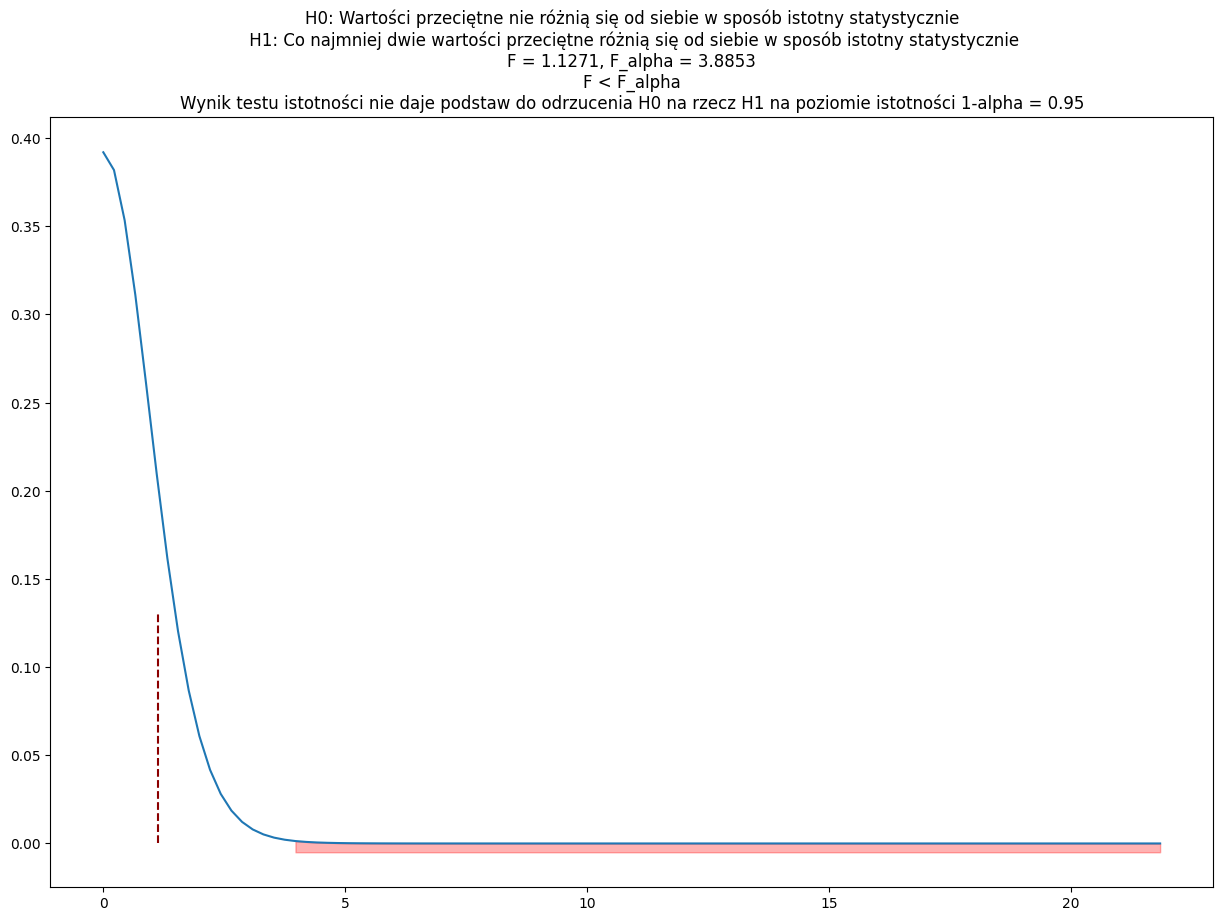

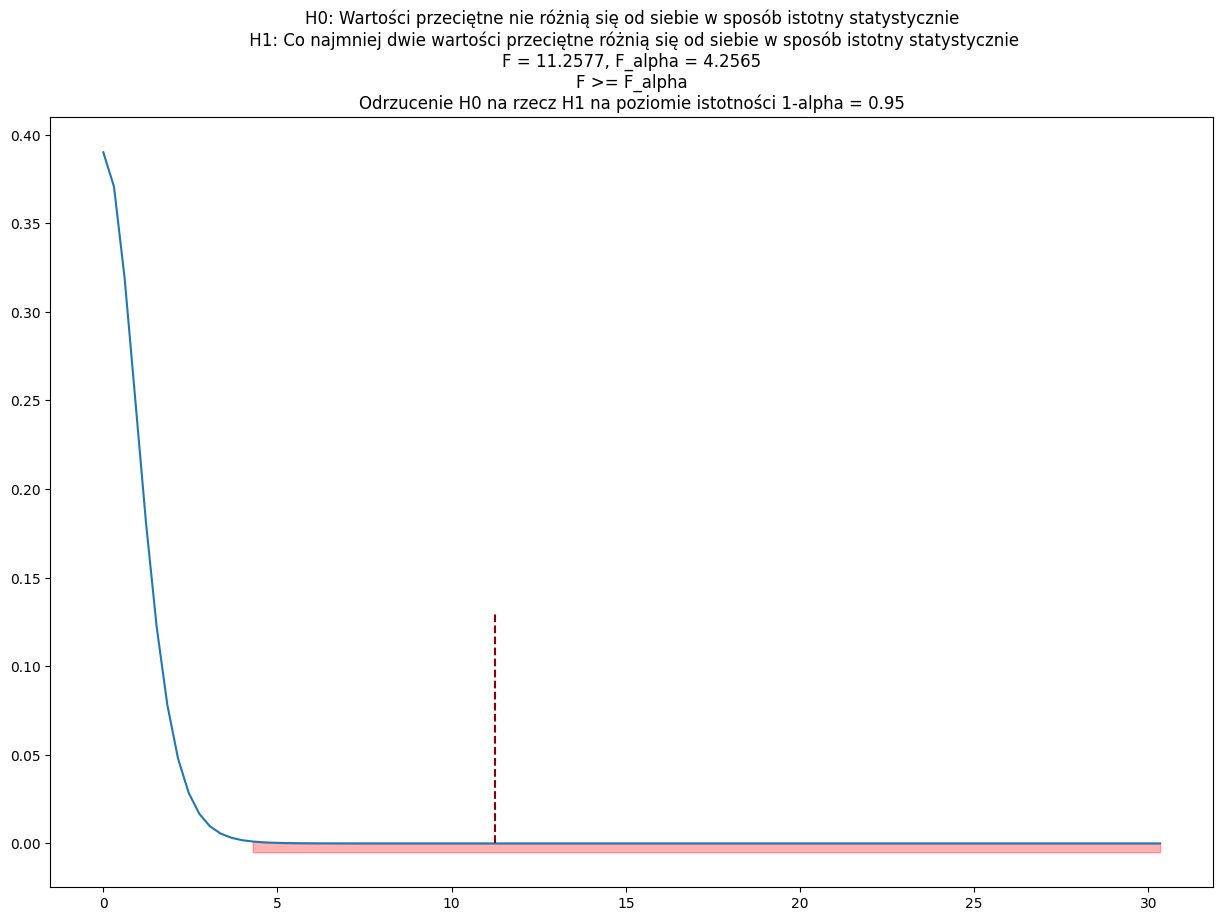

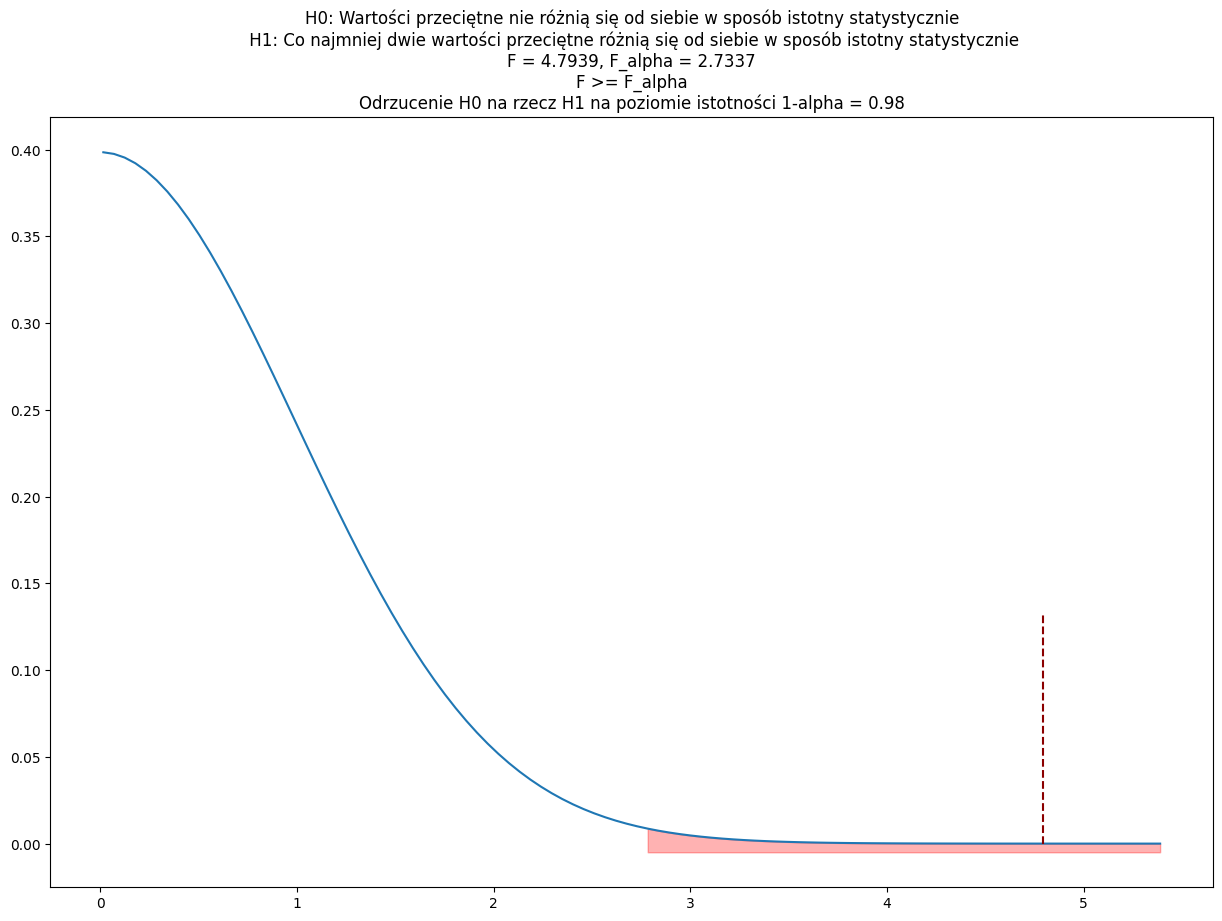

In [6]:
### Komórka testowa

assert np.all(np.isclose(anova(test_data_1, 0.05), (1.127072228543553, 3.8852938346523946, 0)))
assert np.all(np.isclose(anova(test_data_2, 0.05), (11.25773195876289, 4.256494729093748, 1)))
assert np.all(np.isclose(anova(test_data_3, 0.02), (4.79388401864753, 2.7336800410268243, 1)))

### Zadanie 2: Test HSD Tukeya [10 pkt]

Przygotuj funkcję `tukey_HSD_test()`, która będzie przeprowadzać test HSD Tukeya dla wszystkich par prób losowych w analizowanym zestawie danych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres heatmap zawierający wartości współczynników HSD wyliczonych dla wszystkich par prób losowych. Dodatkowo:
- ustaw skalę kolorów wykresu na coolwarm wycentrowaną na wartości statystyki HSD_alpha (odcienie ciepłe dla pól o wartości współczynnika HSD większej od HSD_alpha, odcienie zimne dla pól o wartości współczynnika HSD mniejszej od HSD_alpha),
- dołącz do wykresu pasek kolorów,
- ustaw parametry wykresu tak, aby wartości statystyk HSD wyświetlały się z dokładnością 3 miejsc po przecinku.
 
Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartość wyznaczonej statystyki HSD_alpha,
- zależności między wartościami statystyk HSD i HSD_alpha decydującą o wyniku testu i związane z nimi informacje o wyniku testu: "HSD < HSD_alpha: Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "HSD >= HSD_alpha: Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występująca w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku HSD i HSD_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: Porównywane wartości przeciętne nie różnią się od siebie w sposób istotny statystycznie`</br>
    `H1: Porównywane wartości przeciętne różnią się od siebie w sposób istotny statystycznie`</br>
    `HSD_alpha = 2.351`</br>
    `HSD < HSD_alpha: Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>
    `HSD >= HSD_alpha: Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne funkcji napisanie od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających testu HSD Tukeya. W celu otrzymania wartości parametru `HSD_alpha` należy skorzystać z funkcji `sp.stats.studentized_range.ppf()`.

In [7]:
def tukey_HSD_test(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych.
        Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególncy prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    HSD: DataFrame
        Tablica zawierająca wartości statystyki HSD wyliczonych na podstawie poszczególnych par porównywanych prób losowych.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    HSD_alpha: float
        Wartość statystyki HSD_alpha.
    H: DataFrame
        Tablica zawierająca wartości int określające wynik testu dla poszczególnych par porównywanych prób losowych:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    """    
    # YOUR CODE HERE
    n = np.sum(~data.isna()).sum()
    k = len(data.columns)

    temp = 0

    HSD = pd.DataFrame(index=data.columns, columns=data.columns)

    for col in data.columns:
        n_i = len(data[col].dropna())
        mean_i = data[col].mean()
        for j in range(n_i):
            temp = temp + (data[col][j] - mean_i)**2

    for idx in HSD.index:
        for col in HSD.columns:
            a = data[idx]
            b = data[col]
            na = len(a.dropna())
            nb = len(b.dropna())
            sx = np.sqrt(((temp / (n-k)) / 2) * (1/na + 1/nb))
            HSD_value = abs(np.mean(a) - np.mean(b)) / sx
            HSD.loc[idx, col] = HSD_value   
            
    HSD_alpha = sp.stats.studentized_range.ppf(1 - alpha, k, n-k)
    HSD = HSD.astype('float')
    H = (HSD >= HSD_alpha).astype('int')
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    fig.set_facecolor('white')
    alpha = 0.05
    divnorm = mpl.colors.TwoSlopeNorm(vmin=np.min(HSD)-2, vcenter=HSD_alpha, vmax=np.max(HSD)+2)
    sns.heatmap(HSD, annot=True, cmap='coolwarm', norm=divnorm, fmt=".3f", ax=ax, vmin=np.min(HSD), vmax=np.max(HSD))
    ax.set_title("H0: Porównywane wartości przeciętne nie różnią się od siebie w sposób istotny statystycznie\n H1: Co najmniej dwie wartości przeciętne różnią się od siebie w sposób istotny statystycznie\n HSD_alpha = "+format(HSD_alpha, "0.4f")+\
                    "\n HSD < HSD_alpha: Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)+\
                "\nHSD >= HSD_alpha: Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha))

    return HSD, HSD_alpha, H

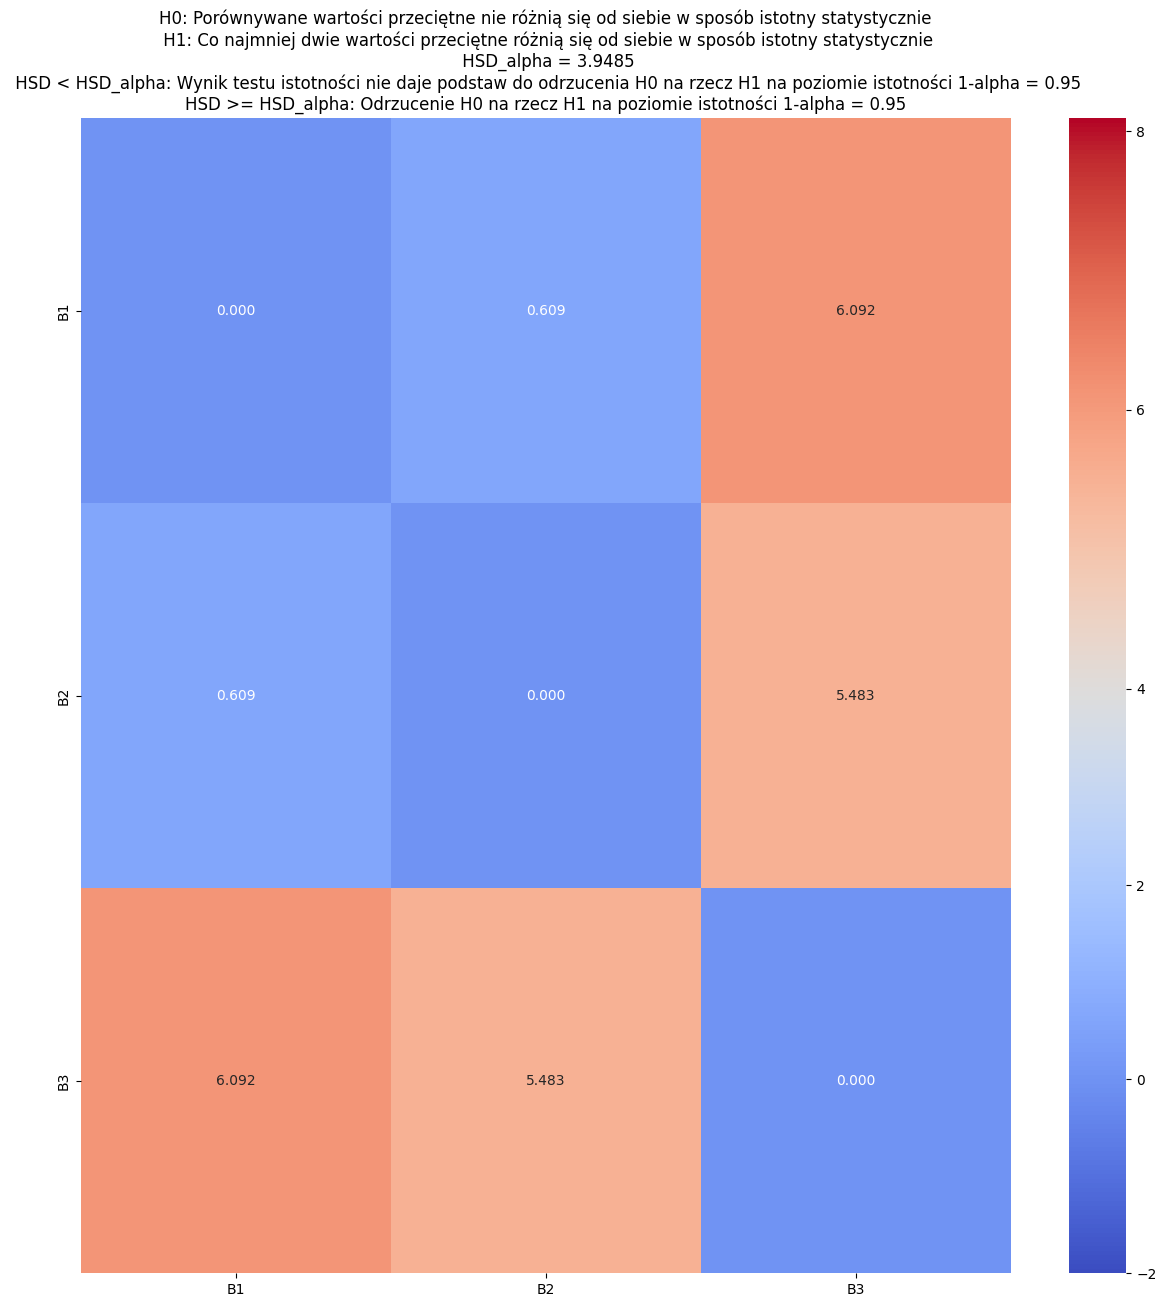

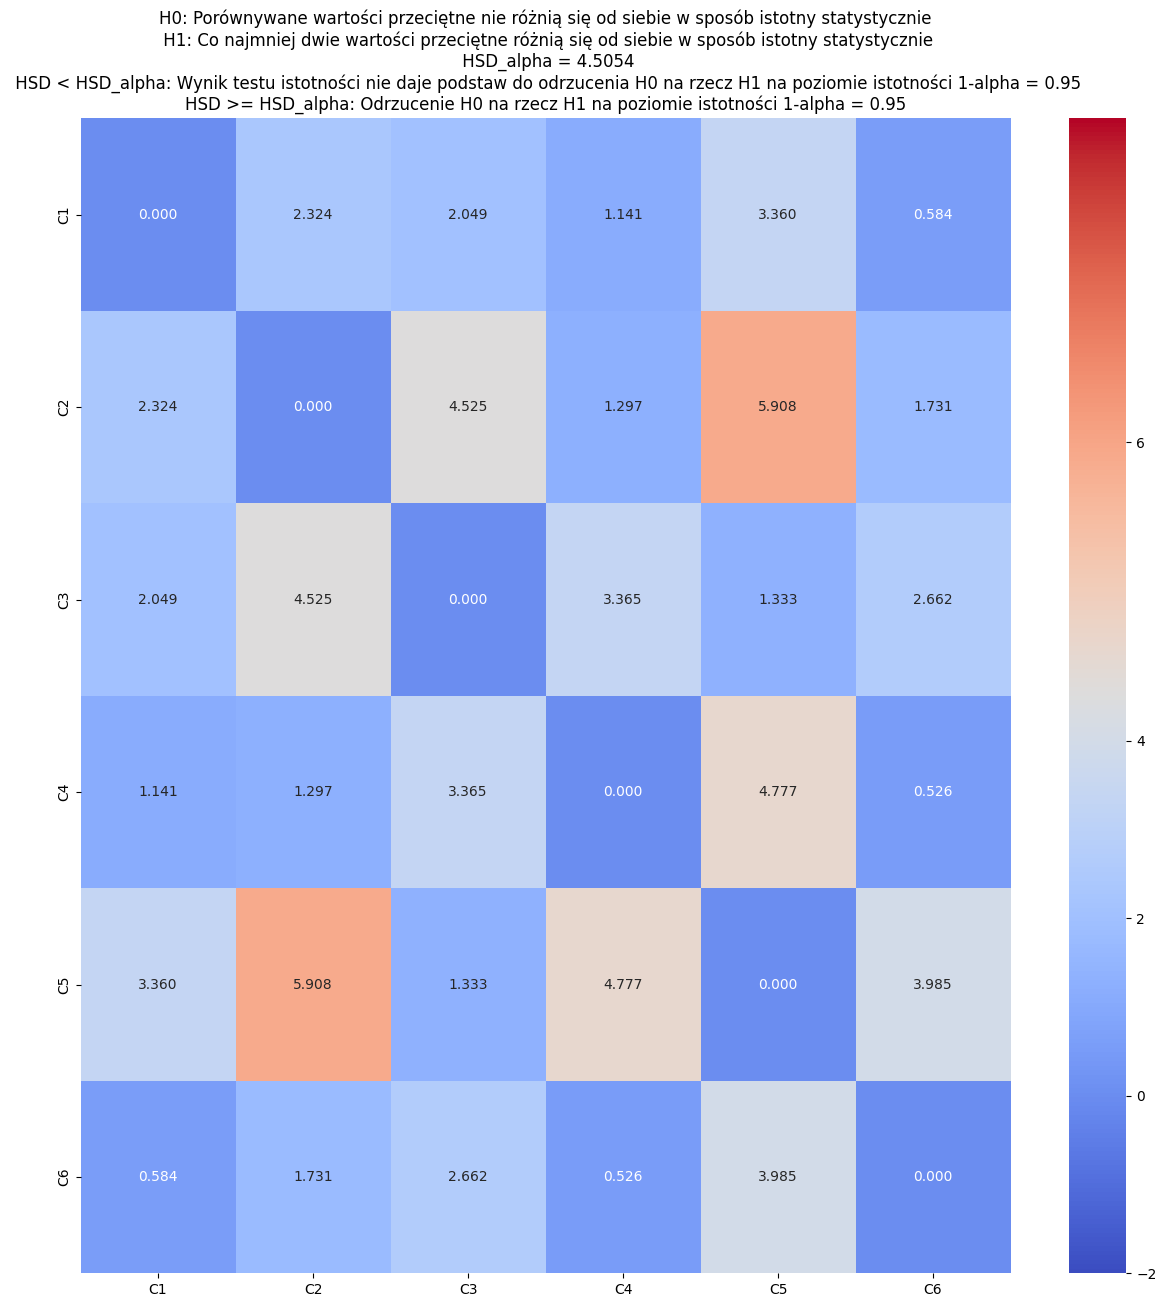

In [8]:
### Komórka testowa

HSD, HSD_alpha, H = tukey_HSD_test(test_data_2, 0.05)
# Test 1 Kształt tablicy
assert HSD.shape == (3, 3)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(HSD.index)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.index)) & set(['B1', 'B2', 'B3'])) == 3
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0., 0.6092077, 6.09207699], [0.6092077, 0., 5.48286929], [6.09207699, 5.48286929, 0.]])))
assert np.isclose(HSD_alpha, 3.948492203457512)
assert np.all(np.isclose(H.values , np.array([[0, 0, 1], [0, 0, 1], [1, 1, 0]])))

HSD, HSD_alpha, H = tukey_HSD_test(test_data_3, 0.02)
# Test 1 Kształt tablicy
assert HSD.shape == (6, 6)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
assert len(set(list(HSD.index)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0.       , 2.32398801, 2.04925654, 1.14092171, 3.35959821, 0.58434888],
                                               [2.32398801, 0.        , 4.52485149, 1.29679893, 5.90844249, 1.73148729],
                                               [2.04925654, 4.52485149, 0.        , 3.36510324, 1.33306438, 2.66216438],
                                               [1.14092171, 1.29679893, 3.36510324, 0.        , 4.77709994, 0.52585424],
                                               [3.35959821, 5.90844249, 1.33306438, 4.77709994, 0.        , 3.98505536],
                                               [0.58434888, 1.73148729, 2.66216438, 0.52585424, 3.98505536, 0.        ]])))
assert np.isclose(HSD_alpha, 4.50539007862777)
assert np.all(np.isclose(H.values , np.array([[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0],
                                               [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0],
                                               [0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]])))